# Ethio Jobs

[Ethiojobs.net](ethiojobs.net) is a major online platform for sharing job postings in Ethiopia.



# Data


In [23]:
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plot formatting
from ipywidgets import * # interactive plots
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime # working with dates in the dataset

# Pandas widnow options
pd.set_option('max_columns', 180)
pd.set_option('max_rows', 99999)
# pd.set_option('max_colwidth', 5000)
# pd.set_option('display.float_format', lambda x: '%.2f' % x) # turn off sci-notation globally

In [3]:
# Widen the notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Higher quality plots
%config InlineBackend.figure_format = 'retina'

# View Multiple variable outputs at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



### Visuals/Insights to explore

* Employment Type breakdown between Job Categories (i.e. which categories have more contract work)

**Geographic**
* Posting count per region
* Average views per region
* Top categories per region

**Categories**
* Average views per category (*noticing that driver titles has low views. Think this can be tied to blue collar jobs and access to internet*)
* Distribution of `career_level` (*maybe pie-charts here?*)

**Aggregate**
* Total views of all posts combined (*i.e. site traffic*)

# 1 About the Data

EthioJobs.net is one of the most popular job listings sites in Ethiopia. 
This dataset scrapes all job listings posted on the website beginning November 2019, and is updated twice daily.


In [4]:
# Load Dataset

# REMOVE THE FOLLOWING AS IT ONLY WORKS LOCALLY TO IMPORT
# WITH LINUX SHELL OVER SSH FROM Yacob's iMac

#    scp 192.168.1.83:/home/yacob/Scripts/DATABASE_backup.csv ./DATABASE_backup.csv

# ## DOESN'T WORK IN JUPYTER, HAVE TO EXECUTE FROM CONSOLE
# import subprocess
# subprocess.call(["scp",
#                "192.168.1.83:/home/yacob/Scripts/DATABASE_backup.csv",
#                "./DATABASE_backup.csv"])  

ej = pd.read_csv('DATABASE_backup.csv')
ej.sort_values('dateposted', ascending=False).head()

,id,title,job_description,org_name,dateposted,validthrough,addressregion,addresscountry,url,category_primary,category_secondary,location,career_level,employment_type,salary,views
3634,243790.0,Project Finance Coordinator,Who we are SOS Children 's Villages Ethiopia ...,SOS Children&#039;s Villages Ethiopia,2020-03-20 11:21:46,2020-03-30 23:59:59,Addis Ababa,ETH,http://www.ethiojobs.net/display-job/243790/Pr...,Accounting and Finance,NaN,"National Office, Addis Ababa",Senior Level (5+ years experience),Contract,NaN,118
3636,243785.0,"Project Coordinator, Youth Entrepreneurship an...",Who we are SOS Children 's Villages Ethiopia ...,SOS Children&#039;s Villages Ethiopia,2020-03-20 11:04:01,2020-03-30 00:00:00,Tigray,ETH,http://www.ethiojobs.net/display-job/243785/Pr...,Development and Project Management,NaN,"Mekelle, Tigray",Senior Level (5+ years experience),Contract,NaN,111
3637,243784.0,"Project Coordinator, Youth Entrepreneurship an...",Who we are SOS Children 's Villages Ethiopia ...,SOS Children&#039;s Villages Ethiopia,2020-03-20 11:01:48,2020-03-30 23:59:59,Addis Ababa,ETH,http://www.ethiojobs.net/display-job/243784/Pr...,Development and Project Management,NaN,"Addis Ababa, Addis Ababa",Senior Level (5+ years experience),Contract,NaN,163
3638,243779.0,National Project and DCM Manager,Who we are SOS Children 's Villages Ethiopia ...,SOS Children&#039;s Villages Ethiopia,2020-03-20 10:32:15,2020-03-30 23:59:59,Addis Ababa,ETH,http://www.ethiojobs.net/display-job/243779/Na...,Development and Project Management,Management,"National Office, Addis Ababa",Senior Level (5+ years experience),Contract,NaN,167
3639,243773.0,Monitoring and Evaluation (M & E) Intern,INTERNSHIP TITLE: Monitoring and Evaluation (...,Mercy Corps Ethiopia,2020-03-20 09:56:29,2020-03-30 23:59:59,Somali,ETH,http://www.ethiojobs.net/display-job/243773/Mo...,Business and Administration,Economics,"Jijiga, Somali",Entry Level (Fresh Graduate),Internship,NaN,253


In [9]:
dim = ej.shape
print(f'There are {dim[0]} rows, and {dim[1]} columns \n(as of {datetime.now()})')

There are 3942 rows, and 16 columns 
(as of 2020-03-21 12:49:16.575813)


In [10]:
# Count null values

for i in ej.columns:
    null_count = ej[i].isna().sum()
    print(f'{i}: {null_count}')

id: 0
title: 0
job_description: 0
org_name: 0
dateposted: 0
validthrough: 0
addressregion: 0
addresscountry: 0
url: 0
category_primary: 0
category_secondary: 1950
location: 5
career_level: 470
employment_type: 0
salary: 1824
views: 0


# 2 Job Categories
## 2.1 Distribution and Frequency

Let's take a look at the variety of categories posted

In [12]:
print(f"There are {ej['category_primary'].unique().shape[0]} unique job categories, out of {dim[0]} job postings")

There are 48 unique job categories, out of 3942 job postings


Let's see what are the leading categories by count

In [13]:
pd.DataFrame( 
    {"n":ej['category_primary'].value_counts(),
     "percent_of_total": (ej['category_primary'].value_counts()*100 / ej['category_primary'].shape[0]).round(2) 
    } 
)

,n,percent_of_total
Accounting and Finance,585,14.84
Health Care,373,9.46
Development and Project Management,364,9.23
Business and Administration,293,7.43
Engineering,283,7.18
Agriculture,253,6.42
Consultancy and Training,193,4.90
Admin,176,4.46
Logistics,111,2.82
Sales and Marketing,109,2.77


## 2.2 Views by Job Category

An extra `mean/count` variable is added that simply denotes the mean number of views per post. This can be viewed as a crude proxy for view traffic for respective Job Categories.

In [14]:
A = ej.groupby('category_primary')['views'].agg(['count', 'sum','mean', 'std','max','min','median'])
B = pd.DataFrame({'mean/count':A["mean"]/A["count"]})

views_category = pd.concat([A,B], axis=1).sort_values(by='count', ascending=False).apply(lambda x:round(x,2))

In [15]:
import dtale
d = dtale.show(views_category, ignore_duplicate=True)
d

## 2.3 Job Postings Frequency Over Time

Let's examine how job posting trends over time broken down by category.

First, we need to convert the `datePosted` field to `DateTime` data type.

In [16]:
ej['dateposted'] = pd.to_datetime( ej['dateposted'], format='%Y-%m-%d %H:%M:%S')
ej['validthrough'] = pd.to_datetime( ej['validthrough'], infer_datetime_format = True) # No need to infer. Left in because it's a handy option

ej.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3942 entries, 0 to 3941
Data columns (total 16 columns):
id                    3942 non-null float64
title                 3942 non-null object
job_description       3942 non-null object
org_name              3942 non-null object
dateposted            3942 non-null datetime64[ns]
validthrough          3942 non-null datetime64[ns]
addressregion         3942 non-null object
addresscountry        3942 non-null object
url                   3942 non-null object
category_primary      3942 non-null object
category_secondary    1992 non-null object
location              3937 non-null object
career_level          3472 non-null object
employment_type       3942 non-null object
salary                2118 non-null object
views                 3942 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(1), object(12)
memory usage: 492.9+ KB


# 3 Location

## 3.1 Frequency Count by Region

Regions here correspond to the 11 Administrative Zones of Ethiopia, that are not unlike the States within the U.S.A.

In [17]:
ej['addressregion'].value_counts()

 Addis Ababa           2519
 Oromia                 453
 Somali                 208
 Amhara                 201
 SNNPR                  181
 Gambela                108
 Tigray                  97
 Benishangul Gumuz       74
 Afar                    29
 Harari                  27
 Dire Dawa               23
 Ethiopia                 9
 Central Equatoria        7
Ethiopia                  3
 Djibouti                 1
 Nairobi                  1
 Gaborone                 1
Name: addressregion, dtype: int64

In [18]:
location = pd.DataFrame(ej['addressregion'].value_counts())
location.head()

,addressregion
Addis Ababa,2519
Oromia,453
Somali,208
Amhara,201
SNNPR,181


#### **Create a list of Official Administrative Regions to filter out innacurate/irrelevant locations**

In [20]:
loc_regions = [' Addis Ababa ', ' Oromia ', ' Amhara ', ' Somali ', ' SNNPR ',
       ' Gambela ', ' Tigray ', ' Benishangul Gumuz ', ' Harari ',
       ' Dire Dawa ', ' Afar ']

### Visualize Job Postings by Region

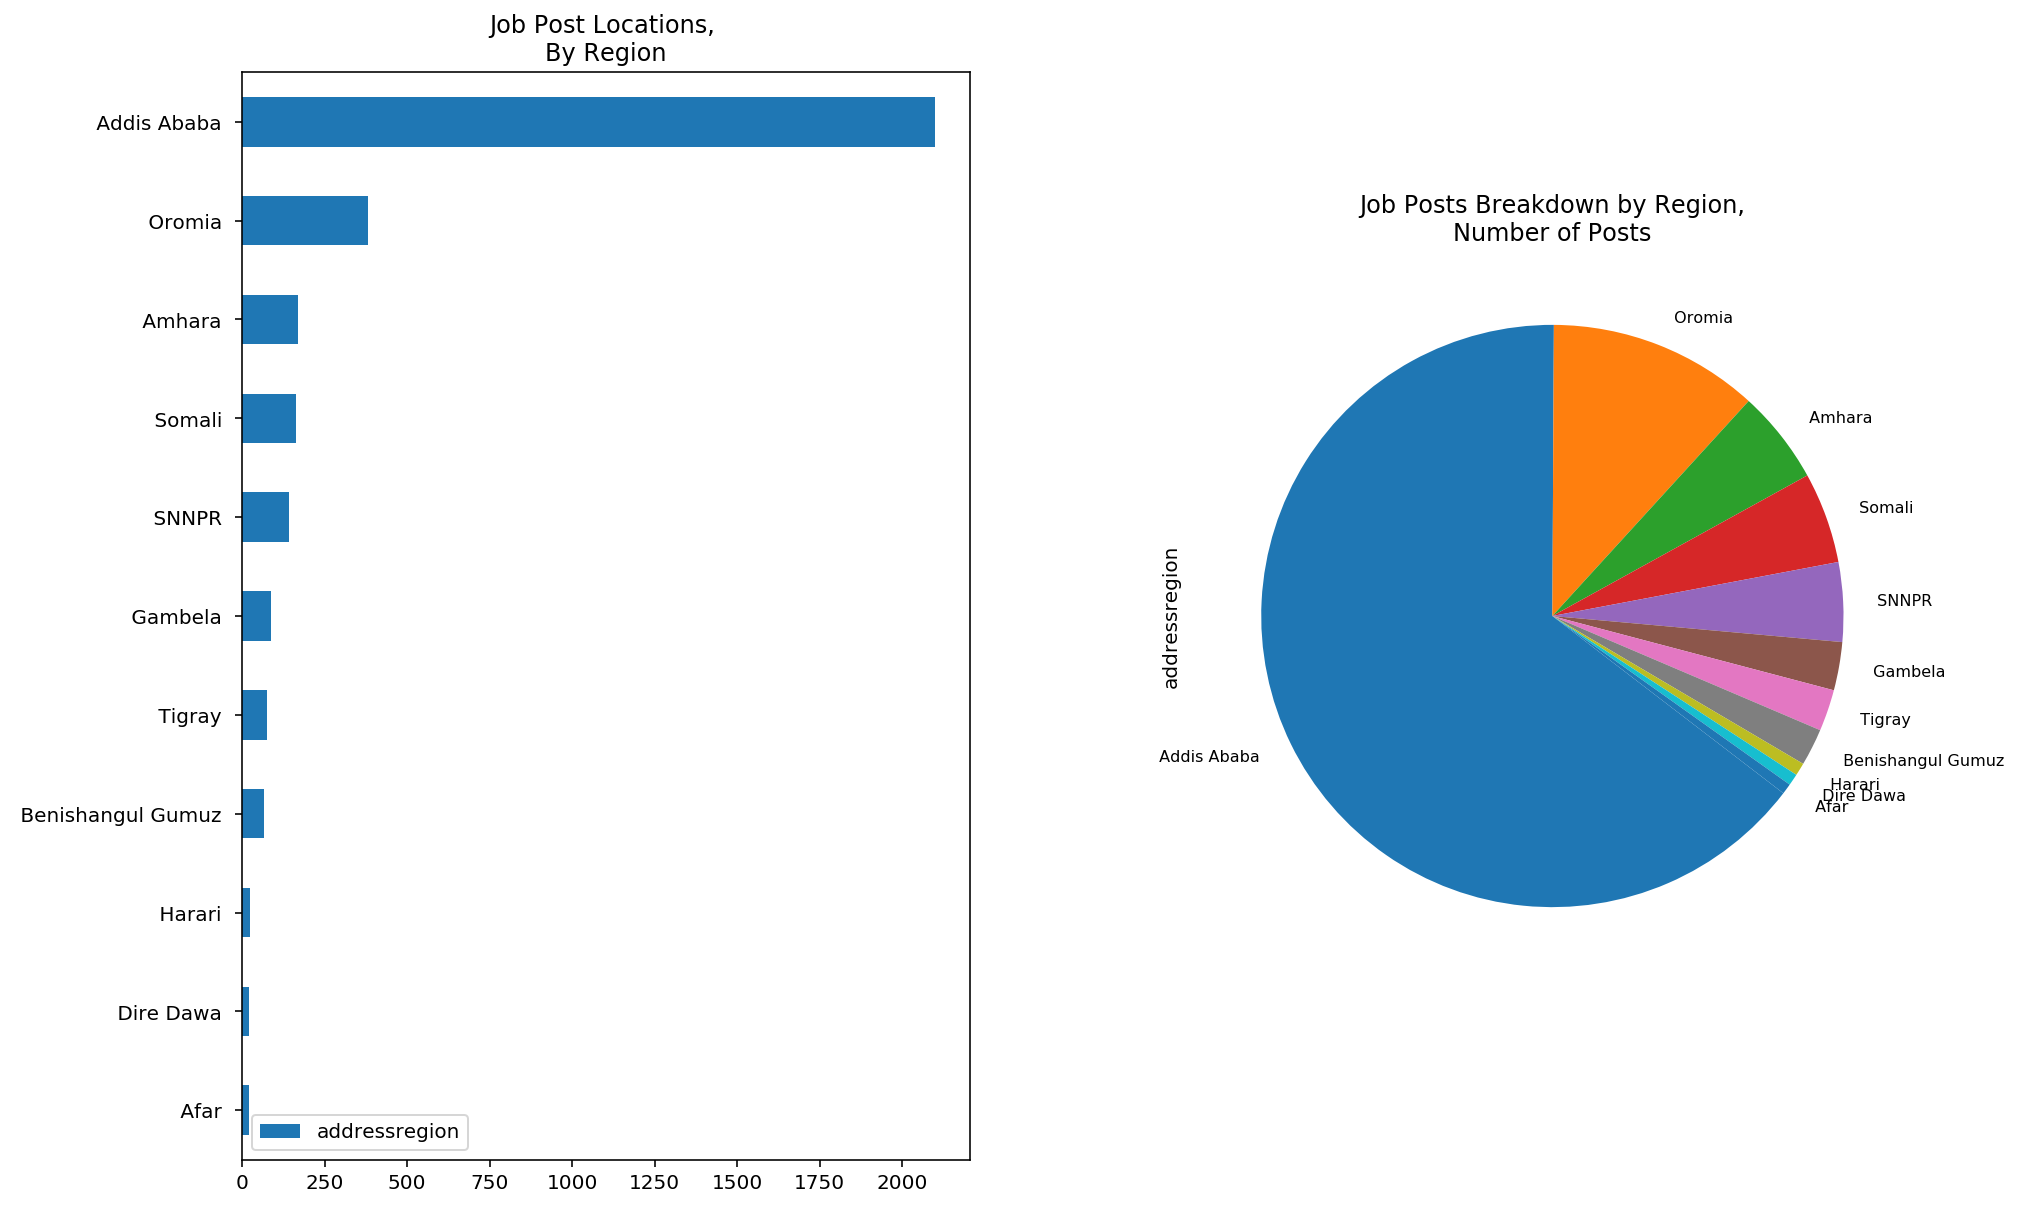

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax1, ax2 = axes.flatten()
fig.subplots_adjust(hspace=.5, wspace=.3)

# Left (Bar Plot)
location.loc[loc_regions].sort_values(by='addressregion').plot(
    ax = ax1,
    kind="barh", 
    y='addressregion',
    title = "Job Post Locations, \nBy Region"
)



# Right (pie-chart)
location.loc[loc_regions].plot.pie(
    ax = ax2,
    y='addressregion',
    startangle=-37.5,
    counterclock=False,
    title='Job Posts Breakdown by Region,\nNumber of Posts',
    #colormap=plt.cm.Accent,
    fontsize=8,
    wedgeprops={'linewidth':0},
    legend = False
);

## Listing Views based on Geographic Location

In [21]:
A = ej[['addressregion','views']].groupby("addressregion").agg(np.sum).loc[loc_regions]
B = ej[['addressregion','views']].groupby("addressregion").agg(np.sum).loc[loc_regions].apply(lambda g: round(g*100 / g.sum(),2))

pd.DataFrame({"Views":A.views, "%":B.views})

,Views,%
addressregion,,
Addis Ababa,2505907,64.63
Oromia,349831,9.02
Amhara,207556,5.35
Somali,236945,6.11
SNNPR,182903,4.72
Gambela,128379,3.31
Tigray,103048,2.66
Benishangul Gumuz,80409,2.07
Harari,24677,0.64


Jobs posted in Addis Ababa (AA) take the lion's share of views. The remainder of the list falls in line with population count of the respective regions. AA is highly over represented in relation to its population, and is a reflection of not only AA's high degree of urbanization, but also its undisputed status as the primary economic hub of the country. 

***SPECIFY THE ABOVE WITH ACTUAL POPULATION FIGURES***

# 4 Employment Type

What trends can we observe around empolyment type between job fields? 

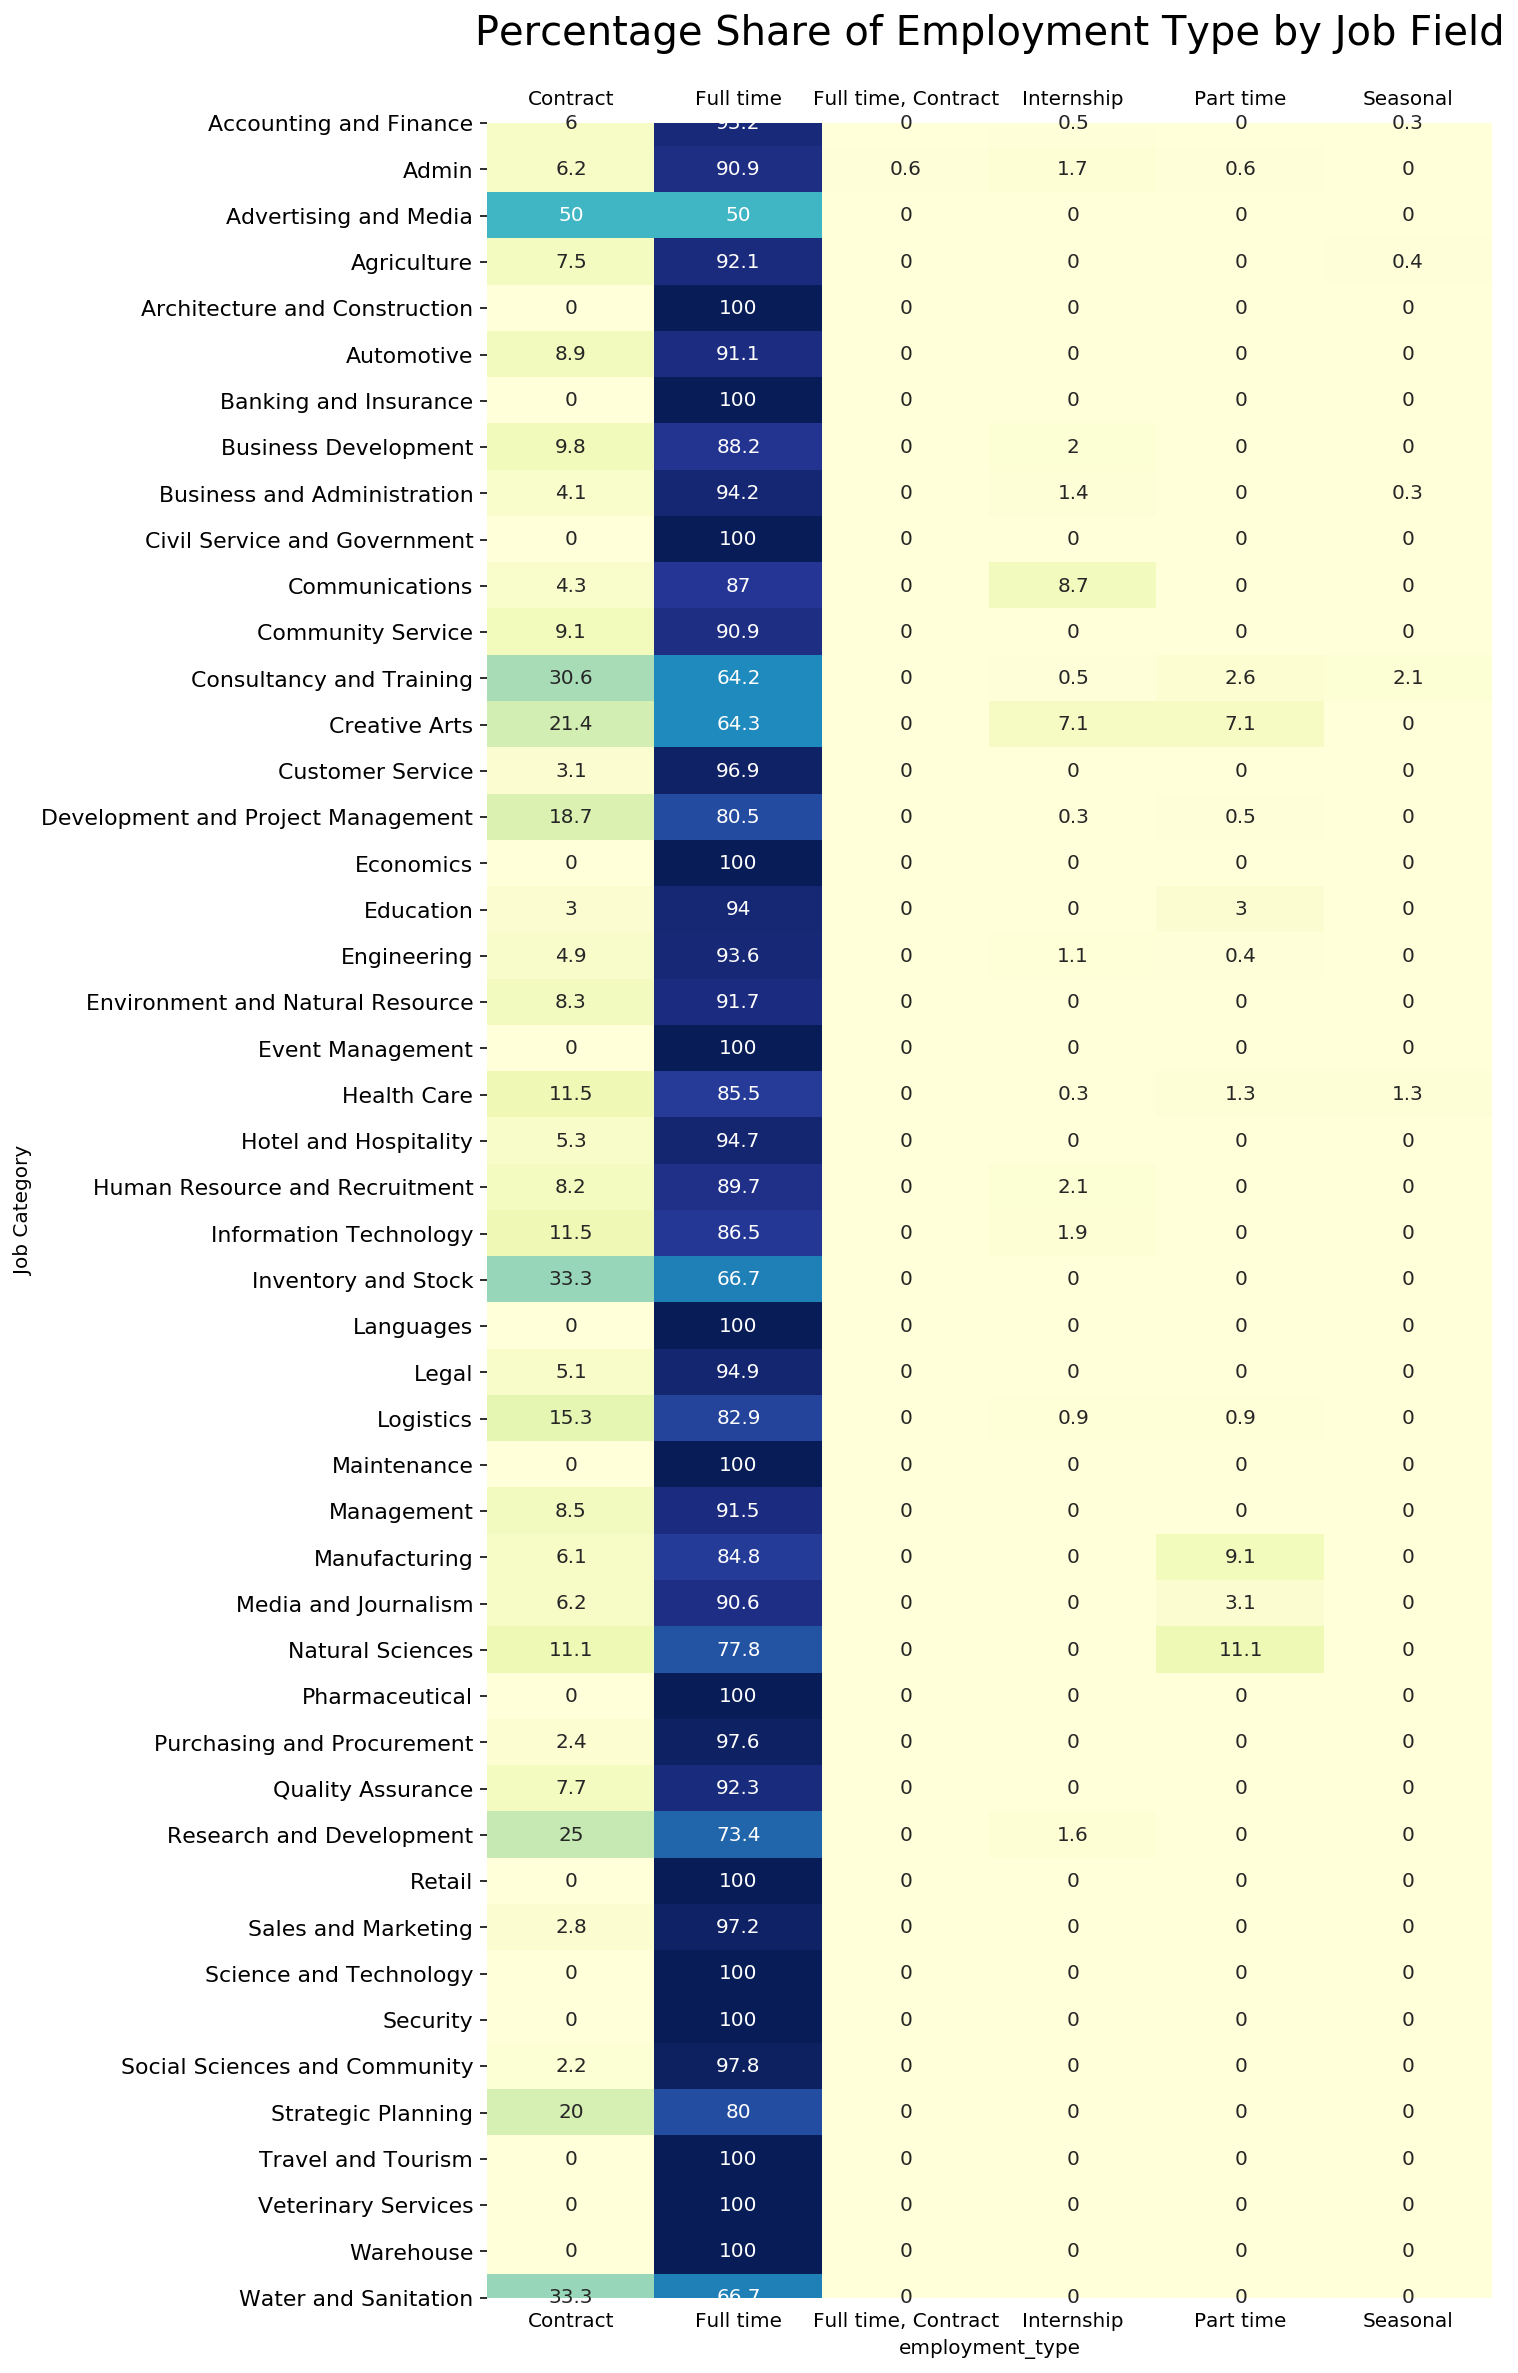

In [43]:
# Set figure Dimensions
fig_dims = (9, 20)

fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(pd.crosstab(ej.category_primary, ej.employment_type, normalize="index").round(3)*100,
           cmap="YlGnBu", annot=True, cbar=False, fmt='g')
plt.title('Percentage Share of Employment Type by Job Field',
         fontdict = {'fontsize':20}, pad=39)

# Turn off x-axis tick marks, and add labels to the top
ax.tick_params(axis="x", bottom=False, labeltop=True)
# 
ax.tick_params(axis="y", labelsize=11)

ax.set_ylabel("Job Category");

# Note: cut off rows for top and bottom of highlight table are a bug in this version of matplotlib
# source: https://stackoverflow.com/a/56942725/12085897